# 라이브러리 정의

In [1]:
# 시각화 라이브러리 정의

import pandas as pd
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

# 통합 데이터 읽어들이기

In [2]:
file_path = "./02_data_all/df_bus_card_tot.csv"

df_bus_card_tot = pd.read_csv(file_path, sep=',')
df_bus_card_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   승차시각        842608 non-null  object 
 1   하차시각        842608 non-null  object 
 2   승객연령        841683 non-null  object 
 3   승차정류장       842608 non-null  object 
 4   하차정류장       842608 non-null  object 
 5   기준년도        842608 non-null  int64  
 6   기준월         842608 non-null  int64  
 7   기준일         842608 non-null  int64  
 8   기준시간        842608 non-null  int64  
 9   기준분         842608 non-null  int64  
 10  버스내체류시간(분)  842608 non-null  float64
 11  승하차구간       842608 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 77.1+ MB


# 소주제별 현황 분석 및 시각화 하기

In [3]:
df_bus_card_tot["기준년도"].unique()
# 년도가 1개년도만 존재하기에 연도별 비교대상이 없으므로,
# - 현황분석에서는 제외
# - 이러한 사항도 향후 분석 보고서에는 작성해야 합니다.
# (왜, 연도에 대한 분석이 없는지에 대한 타당성 입증 자료로 사용된다.)

array([2020])

In [4]:
"""
<주제 도출>
1. 버스 이용량 분석(필요한 컬럼 : "연도, 월, 일, 시간, 분, 승객연령, count 집계")
    - 연간 버스이용량 분석
    (수집된 데이터 확인 결과 년도느 2020년 1개년도만 있기에 분석에서 제외)
    - 월별 vs 일자별 버스 이용량 현황 분석
    - 일자별 vs 시간별 버스 이용량 현황 분석
    - 시간별 vs 분별 버스 이용량 현황 분석

2. 버스 내 체류시간 분석(필요한 컬럼 : "체류시간")
    - 체류시간 = 하차시각 - 승차시각

3. 버스 승하차 구간별 버스내 체류시간 분석(필요한 컬럼 : "승하차구간")
    - 체류시간이 높은 구간을 기준으로 내림차수하여 급행 도입 가능한 구간 확인하기

** 위 소주제별로 필요한 컬럼들을 데이터프레임에 컬럼을 추가하여 사용(통합을 위해서)
"""

'\n<주제 도출>\n1. 버스 이용량 분석(필요한 컬럼 : "연도, 월, 일, 시간, 분, 승객연령, count 집계")\n    - 연간 버스이용량 분석\n    (수집된 데이터 확인 결과 년도느 2020년 1개년도만 있기에 분석에서 제외)\n    - 월별 vs 일자별 버스 이용량 현황 분석\n    - 일자별 vs 시간별 버스 이용량 현황 분석\n    - 시간별 vs 분별 버스 이용량 현황 분석\n\n2. 버스 내 체류시간 분석(필요한 컬럼 : "체류시간")\n    - 체류시간 = 하차시각 - 승차시각\n\n3. 버스 승하차 구간별 버스내 체류시간 분석(필요한 컬럼 : "승하차구간")\n    - 체류시간이 높은 구간을 기준으로 내림차수하여 급행 도입 가능한 구간 확인하기\n\n** 위 소주제별로 필요한 컬럼들을 데이터프레임에 컬럼을 추가하여 사용(통합을 위해서)\n'

In [5]:
df_bus_card_tot.head(30)

,승차시각,하차시각,승객연령,승차정류장,하차정류장,기준년도,기준월,기준일,기준시간,기준분,버스내체류시간(분),승하차구간
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,양덕차고지,동부초등학교,2020,1,2,5,10,7.92,양덕차고지 → 동부초등학교
1,2020-01-02 05:13:38,2020-01-02 05:45:49,일반,문덕사거리,새마을금고해도지점,2020,1,2,5,13,32.18,문덕사거리 → 새마을금고해도지점
2,2020-01-02 05:15:49,2020-01-02 05:19:30,일반,문덕사거리,성우오토모티브,2020,1,2,5,15,3.68,문덕사거리 → 성우오토모티브
3,2020-01-02 05:16:17,2020-01-02 05:50:46,일반,부영사랑3차,오거리,2020,1,2,5,16,34.48,부영사랑3차 → 오거리
4,2020-01-02 05:18:41,2020-01-02 05:23:10,일반,문덕온천,용덕사거리,2020,1,2,5,18,4.48,문덕온천 → 용덕사거리
5,2020-01-02 05:19:08,2020-01-02 05:42:02,일반,법원검찰청,죽도시장,2020,1,2,5,19,22.90,법원검찰청 → 죽도시장
6,2020-01-02 05:19:23,2020-01-02 05:36:41,일반,삼성쉐르빌,북부시장/채움병원,2020,1,2,5,19,17.30,삼성쉐르빌 → 북부시장/채움병원
7,2020-01-02 05:19:48,2020-01-02 05:27:23,일반,두호동주민센터,죽도시장,2020,1,2,5,19,7.58,두호동주민센터 → 죽도시장
8,2020-01-02 05:20:09,2020-01-02 05:30:52,일반,장량휴먼시아,두호초등학교,2020,1,2,5,20,10.72,장량휴먼시아 → 두호초등학교
9,2020-01-02 05:20:20,2020-01-02 05:39:01,일반,풍림아이원,중앙상가,2020,1,2,5,20,18.68,풍림아이원 → 중앙상가


In [6]:
df_bus_card_str = df_bus_card_tot.astype({'기준년도':str, '기준월':str, '기준일':str, '기준시간':str, '기준분':str})

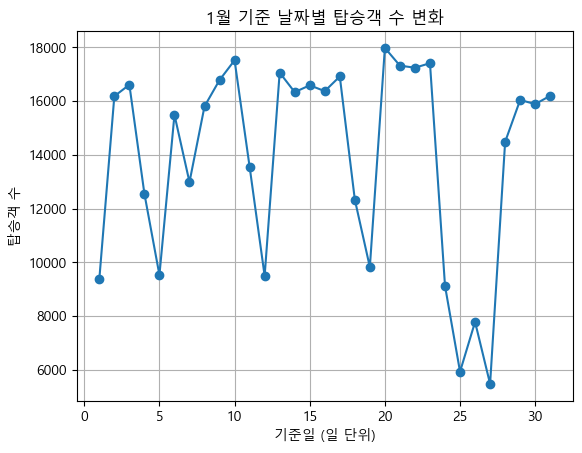

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 기준월이 1인 데이터만 필터링
c = df_bus_card_tot["기준월"] == 1
df_fillter = df_bus_card_tot[c]

# 기준일을 정렬된 리스트로 저장
day1 = sorted(df_fillter["기준일"].unique().tolist())

list_1 = []  # 각 기준일(day)별 데이터 개수를 저장할 리스트

# 1일부터 31일까지 반복하며 데이터 개수 계산
for day in range(1, 32):
    count = (df_fillter["기준일"] == day).sum()  # 해당 날짜의 데이터 개수 계산
    list_1.append(count)

# 그래프 그리기
plt.plot(day1, list_1, marker="o", linestyle="-")
plt.xlabel("기준일 (일 단위)")
plt.ylabel("탑승객 수")
plt.title("1월 기준 날짜별 탑승객 수 변화")
plt.grid(True)
plt.show()

In [8]:
# - 현황 분석
#   -> 

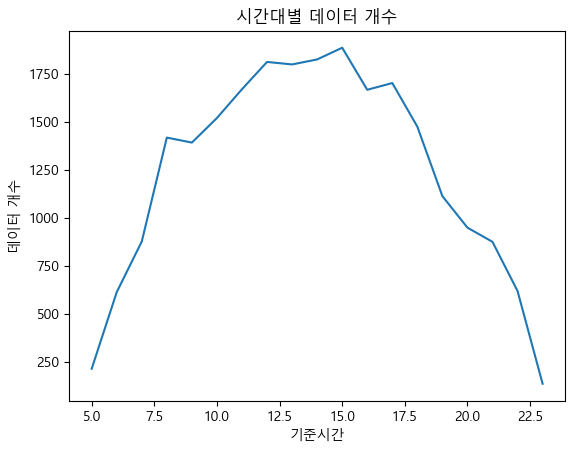

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 기준일이 1인 데이터만 필터링
c = df_bus_card_tot["기준일"] == 1
df_fillter = df_bus_card_tot[c]

# 기준시간을 오름차순으로 정렬
day1 = sorted(df_fillter["기준시간"].unique().tolist())

list_1 = []  # 시간별 데이터 개수를 저장할 리스트

# 5시부터 23시까지 반복하며 각 시간대의 데이터 개수 계산
for hour in range(5, 24):
    c = df_fillter[df_fillter["기준시간"] == hour]
    list_1.append(len(c))

# 정렬된 기준시간(day1)과 데이터 개수를 그래프로 출력
plt.plot(day1, list_1)
plt.xlabel("기준시간")
plt.ylabel("데이터 개수")
plt.title("시간대별 데이터 개수")
plt.show()

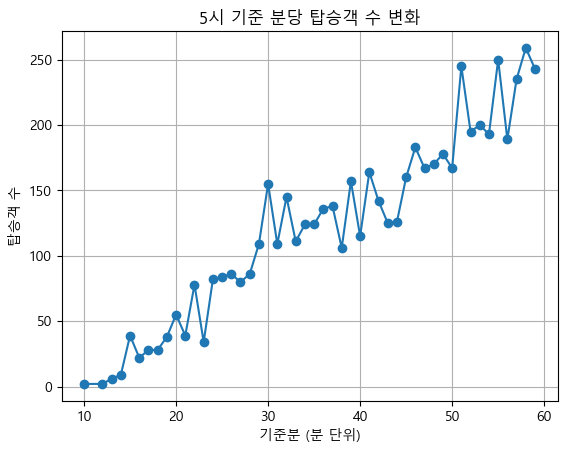

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 기준시간이 5인 데이터만 필터링
c = df_bus_card_tot["기준시간"] == 5
df_fillter = df_bus_card_tot[c]

# 기준분(분 단위)을 오름차순으로 정렬
minute_people = sorted(df_fillter["기준분"].unique().tolist())

list_1 = []  # 각 분(minute)마다 데이터 개수를 저장할 리스트

# 기준분(minute)별 데이터 개수 계산
for minute in minute_people:
    c = df_fillter[df_fillter["기준분"] == minute]  # 해당 분만 필터링
    list_1.append(len(c))  # 데이터 개수 추가

# 그래프 그리기
plt.plot(minute_people, list_1, marker="o", linestyle="-")
plt.xlabel("기준분 (분 단위)")
plt.ylabel("탑승객 수")
plt.title("5시 기준 분당 탑승객 수 변화")
plt.grid(True)
plt.show()


In [11]:
# 집계
temp = df_bus_card_tot.pivot_table(
    index="승하차구간", 
    values="버스내체류시간(분)", 
    aggfunc="sum")

# 정렬하기
# 내림차순 : 높은값 부터 낮은값 (descending, DESC, ascending=False)
temp = temp.sort_values("버스내체류시간(분)", ascending=False)

# 상위 15개만
temp = temp.head(15)

### 행 인덱스 값(보이는 인덱스 값)을 컬럼으로 사용하기
# - 인덱스를 컬럼으로 변경하기

## 처리한 데이터프레임의 결과를 변수에 담지않고 직접 메모리에 저장시키는 방법
# - inplace=True를 파라미터로 정의
temp.reset_index(inplace=True)

# 버스내체류시간 평균값 구하기
sum = temp["버스내체류시간(분)"].sum()
avg = sum / len(temp)

avg


np.float64(45077.02466666667)

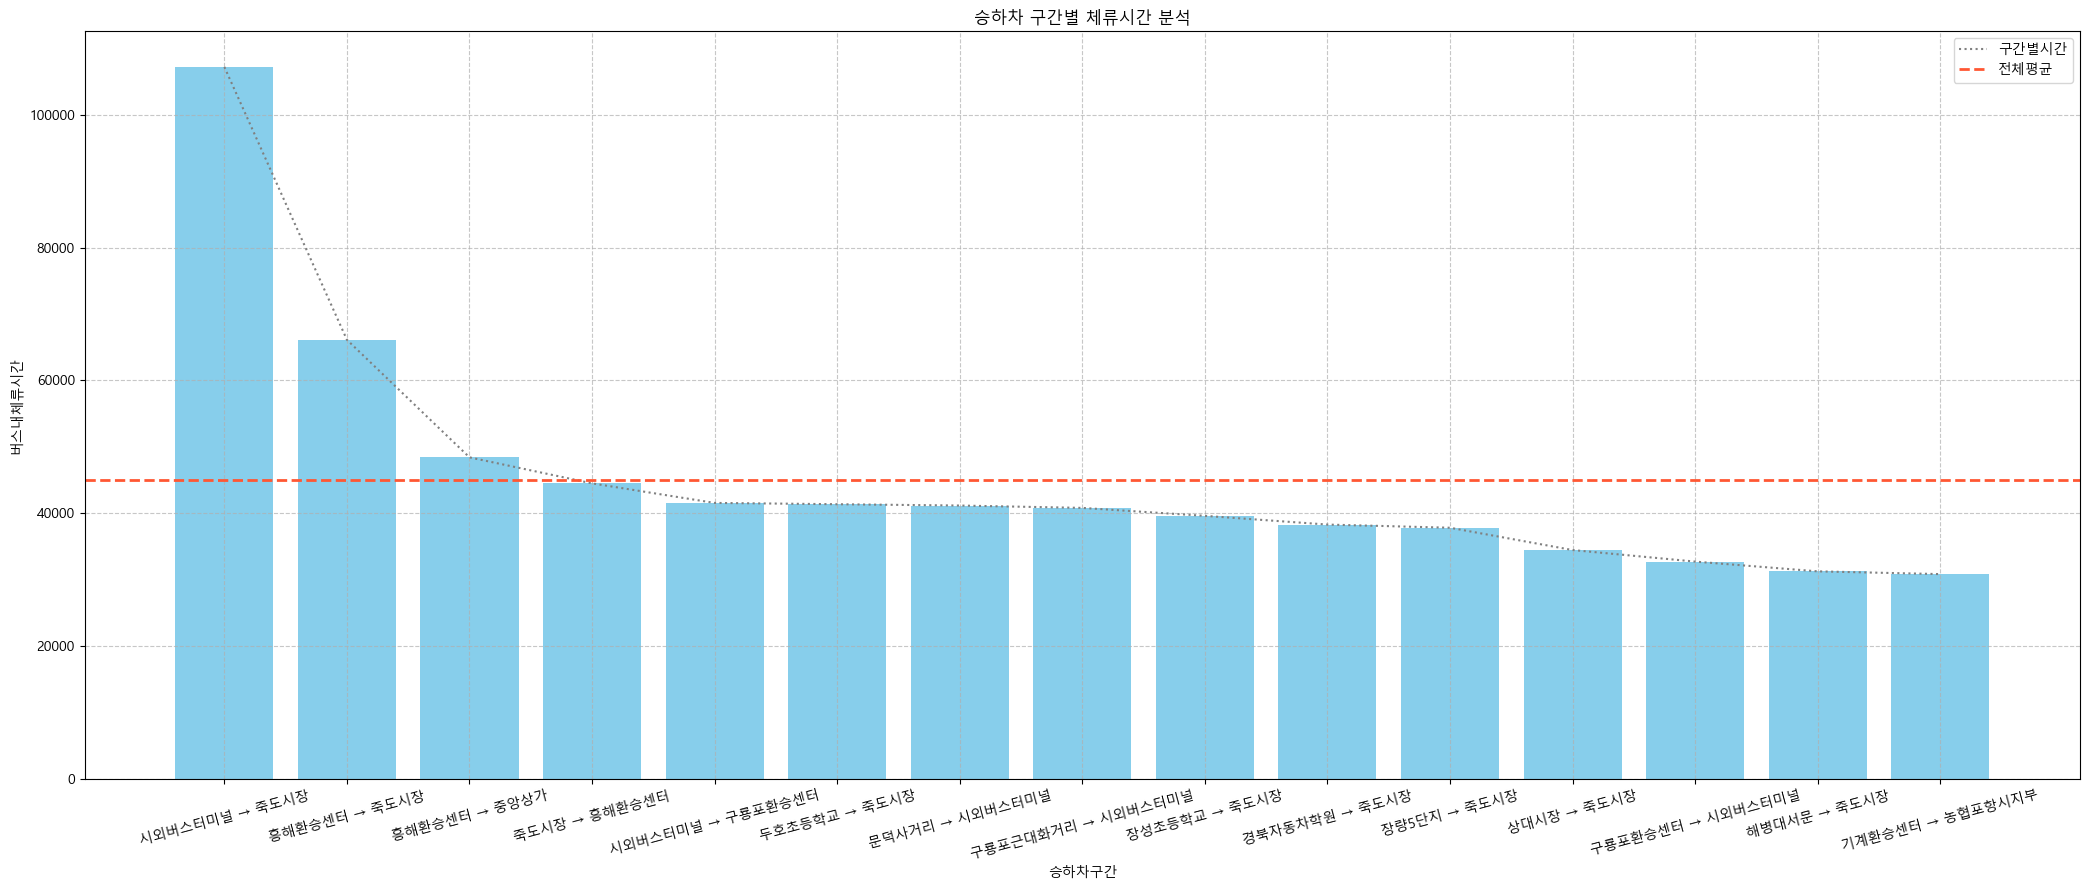

In [12]:
### 그래프 전체 크기 조정 : figsize(너비, 높이)
plt.figure(figsize=(21, 9))

plt.title("승하차 구간별 체류시간 분석")

### 선 그래프 그리기
plt.bar(temp["승하차구간"], temp["버스내체류시간(분)"], color = "skyblue") 
plt.plot(temp["승하차구간"], temp["버스내체류시간(분)"], color = "gray", linestyle=':', label = "구간별시간")

### x축 y축 이름 넣기
plt.xlabel("승하차구간")
plt.ylabel("버스내체류시간")

# x축 값 이름 가독성 확보
plt.xticks(rotation=15)

# x축 기준 수평선 추가
plt.axhline(y=45077, color='#FF5733', linestyle='--', linewidth=2, label = "전체평균")

plt.tight_layout()

# 리스트로 범례 목록 정의
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
그래프 해석
일부 승하차 구간(좌측에 있는 몇 개의 구간)은 체류시간이 평균보다 훨씬 높아 교통 정체가 심하거나, 많은 사람이 머무르는 장소일 가능성이 있음을 예측해볼 수 있음

시외버스터미널 -> 죽도시장, 홍해환승센터 ->, 홍해환승센터 -> 중앙상가, 죽도시장 -> 홍해환승센터 정류장 이름으로 유추 가능함
대부분의 구간은 평균 체류시간 근처에서 유지되고 있으며, 오른쪽으로 갈수록 체류시간이 줄어드는 패턴이 보임

중앙 평균선보다 높은 구간들은 체류시간이 상대적으로 길어, 개선이 필요한 주요 구간이라고 볼 수 있음

특이점 분석
체류시간이 긴 구간을 해소하기 위해서는 교통 운영 최적화, 시설 개선, 승객 분산 전략 등을 생각해볼 수 있음
교통 운영 최적화 -> 버스 배차 간격 조정, 신호 최적화, 우회 경로 운영
시설 및 인프라 개선 -> 승하차 공간 확장, 대기 공간 및 안내 시스템 개선
승객 분산 및 유도 전략 -> 혼잡 시간대 피크 관리, 추가 교통수단 제공, 실시간 교통 정보 제공

SyntaxError: invalid syntax (1275544776.py, line 1)

In [14]:
### 월 및 일자별 버스 이용량 현황 분석(시각화 포함)
# - 시각화 그래프 선정 : 히트맵
# - 히트맵은 3개의 데이터가 필요한 : index, column, value
# - 필요한 데이터 : 월, 일, 승객연령
df_bus_card_tot.head(1)
df_bus_card_tot.pivot_table()

,승차시각,하차시각,승객연령,승차정류장,하차정류장,기준년도,기준월,기준일,기준시간,기준분,버스내체류시간(분),승하차구간
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,양덕차고지,동부초등학교,2020,1,2,5,10,7.92,양덕차고지 → 동부초등학교
